In [2]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [21]:
final_df = pd.read_parquet('https://github.com/Mlad-en/Intro_Data_Science/raw/main/cleaned_data/final_data_without_speech.parquet')
final_df['sentiment'] = final_df['sentiment'].fillna(0)
final_df.head(10)

,iso_3,year,sentiment,total_amount_paragraphs,amount_climate_change_paragraphs,amount_of_time_spent_on_climate,Region Name,Sub-region Name,Entity,Annual CO₂ emissions (per capita)
0,AFG,2013,0.000000,37,0,0.000000,Asia,Southern Asia,Afghanistan,0.293283
1,AFG,2014,0.427633,22,3,0.136364,Asia,Southern Asia,Afghanistan,0.280299
2,AFG,2015,0.718400,19,1,0.052632,Asia,Southern Asia,Afghanistan,0.290076
3,AFG,2016,0.000000,32,0,0.000000,Asia,Southern Asia,Afghanistan,0.261795
4,AFG,2017,0.000000,18,0,0.000000,Asia,Southern Asia,Afghanistan,0.276853
5,AFG,2018,0.000000,19,0,0.000000,Asia,Southern Asia,Afghanistan,0.294876
6,AFG,2019,-0.859100,19,1,0.052632,Asia,Southern Asia,Afghanistan,0.293401
7,AFG,2020,0.014180,41,5,0.121951,Asia,Southern Asia,Afghanistan,0.299746
8,AGO,2013,-0.124600,35,5,0.142857,Africa,Sub-Saharan Africa,Angola,0.945370
9,AGO,2014,-0.401900,27,1,0.037037,Africa,Sub-Saharan Africa,Angola,0.926986


# Exploratory Data Analysis

For this EDA, we our going to examine the relationships between the sentiment score of a country (based on the grouped paragraphs of the text UN speech split) and the amount of time talked about climate change in the speeches. Also the relationship between the sentiment and the annual emissions for that country is analyzed.

Both will initially be analyzed through correlations.



### Sentiment & Time Spent

In [22]:
# Group by country_name and year, calculate mean sentiment score
grouped_sentiment_data = final_df.groupby(['Entity', 'year'])['sentiment'].mean().reset_index()

# DataFrame with mean sentiment score for each country and year
grouped_sentiment_data.head()

,Entity,year,sentiment
0,Afghanistan,2013,0.000000
1,Afghanistan,2014,0.427633
2,Afghanistan,2015,0.718400
3,Afghanistan,2016,0.000000
4,Afghanistan,2017,0.000000


In [23]:
# Group by country_name and year, calculate mean corruption score
grouped_timespent_data = final_df.groupby(['Entity', 'year'])['amount_of_time_spent_on_climate'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_timespent_data.head()

,Entity,year,amount_of_time_spent_on_climate
0,Afghanistan,2013,0.000000
1,Afghanistan,2014,0.136364
2,Afghanistan,2015,0.052632
3,Afghanistan,2016,0.000000
4,Afghanistan,2017,0.000000


In [24]:
# Merge DataFrames on 'country_name' and 'year'
merged_df = pd.merge(grouped_sentiment_data, grouped_timespent_data, on=['Entity', 'year'])
merged_df.head()

,Entity,year,sentiment,amount_of_time_spent_on_climate
0,Afghanistan,2013,0.000000,0.000000
1,Afghanistan,2014,0.427633,0.136364
2,Afghanistan,2015,0.718400,0.052632
3,Afghanistan,2016,0.000000,0.000000
4,Afghanistan,2017,0.000000,0.000000


In [25]:
# Calculate overall correlation
correlation = merged_df['sentiment'].corr(merged_df['amount_of_time_spent_on_climate'])
correlation

0.2165818976767934

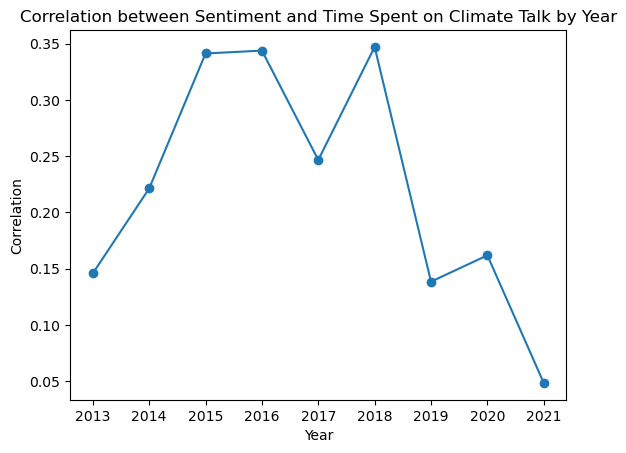

In [26]:
# Calculate correlation for each year
correlations_by_year = merged_df.groupby('year')[['sentiment', 'amount_of_time_spent_on_climate']].corr().iloc[0::2,-1].reset_index()
correlations_by_year.rename(columns={'amount_of_time_spent_on_climate': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year['year'], correlations_by_year['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Time Spent on Climate Talk by Year')
plt.show()

In [27]:
# Print the correlation values for each year
print("Correlation between Sentiment and Time Spent on Climate Talk by Year:")
print(correlations_by_year)

Correlation between Sentiment and Time Spent on Climate Talk by Year:
   year    level_1  correlation
0  2013  sentiment     0.145897
1  2014  sentiment     0.221334
2  2015  sentiment     0.341257
3  2016  sentiment     0.343836
4  2017  sentiment     0.246649
5  2018  sentiment     0.347098
6  2019  sentiment     0.138509
7  2020  sentiment     0.161891
8  2021  sentiment     0.048516


### Sentiment & Annual Emissions 

In [28]:
# Group by country_name and year, calculate mean corruption score
grouped_emissions_data = final_df.groupby(['Entity', 'year'])['Annual CO₂ emissions (per capita)'].mean().reset_index()

# DataFrame with mean corruption score for each country and year
grouped_emissions_data.head()

,Entity,year,Annual CO₂ emissions (per capita)
0,Afghanistan,2013,0.293283
1,Afghanistan,2014,0.280299
2,Afghanistan,2015,0.290076
3,Afghanistan,2016,0.261795
4,Afghanistan,2017,0.276853


In [29]:
# Merge DataFrames on 'country_name' and 'year'
merged_df2 = pd.merge(grouped_sentiment_data, grouped_emissions_data, on=['Entity', 'year'])
merged_df2.head()

,Entity,year,sentiment,Annual CO₂ emissions (per capita)
0,Afghanistan,2013,0.000000,0.293283
1,Afghanistan,2014,0.427633,0.280299
2,Afghanistan,2015,0.718400,0.290076
3,Afghanistan,2016,0.000000,0.261795
4,Afghanistan,2017,0.000000,0.276853


In [30]:
# Calculate overall correlation
correlation = merged_df2['sentiment'].corr(merged_df2['Annual CO₂ emissions (per capita)'])
correlation

0.03496631740109006

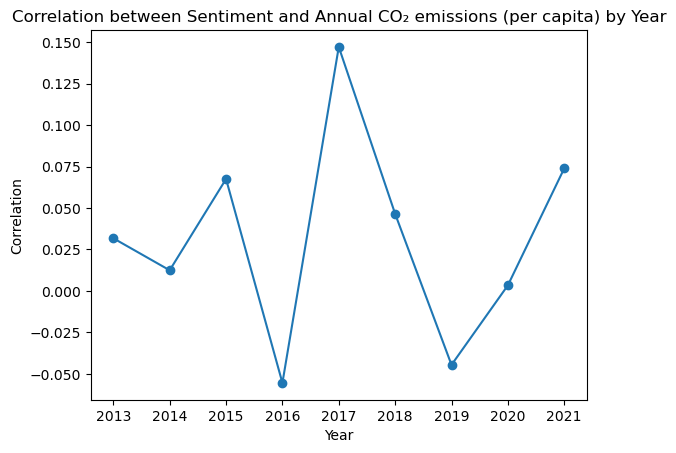

In [31]:
# Calculate correlation for each year
correlations_by_year2 = merged_df2.groupby('year')[['sentiment', 'Annual CO₂ emissions (per capita)']].corr().iloc[0::2,-1].reset_index()
correlations_by_year2.rename(columns={'Annual CO₂ emissions (per capita)': 'correlation'}, inplace=True)

# Plotting
plt.plot(correlations_by_year2['year'], correlations_by_year2['correlation'], marker='o')
plt.xlabel('Year')
plt.ylabel('Correlation')
plt.title('Correlation between Sentiment and Annual CO₂ emissions (per capita) by Year')
plt.show()

In [32]:
# Print the correlation values for each year
print("Correlation between Sentiment and Emissions by Year:")
print(correlations_by_year2)

Correlation between Sentiment and Emissions by Year:
   year    level_1  correlation
0  2013  sentiment     0.031741
1  2014  sentiment     0.012427
2  2015  sentiment     0.067486
3  2016  sentiment    -0.055503
4  2017  sentiment     0.147133
5  2018  sentiment     0.046458
6  2019  sentiment    -0.044615
7  2020  sentiment     0.003354
8  2021  sentiment     0.073876


## Mean time spent on climate change per continent

In [33]:
import plotly
df_ccc = final_df.groupby(['iso_3']).mean()['amount_of_time_spent_on_climate'].reset_index()

data = [dict(type='choropleth', 
            locations = df_ccc['iso_3'],
            z=df_ccc['amount_of_time_spent_on_climate'])]


layout = dict(geo=dict(scope='world'))
  
fig = dict(data=data, 
           layout=layout)
plotly.offline.iplot(fig)


C:\Users\easto\AppData\Local\Temp\ipykernel_27332\39186094.py:2: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.

